# OpenCV图像处理

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1.颜色空间

对图像进行颜色空间转换，比如从BGR 到灰度图，或者从BGR 到HSV 等。
常用函数: ：cv2.cvtColor()，cv2.inRange()

In [1]:
import cv2
flags=[ i for i in dir(cv2) if i.startswith('COLOR_')]

在OpenCV 中有超过150 中进行颜色空间转换的方法。但是你以后就会
发现我们经常用到的也就两种：BGR~Gray 和BGR~HSV。
我们要用到的函数是：cv2.cvtColor(input_image，flag)，其中flag
就是转换类型。
对于BGR~Gray 的转换，我们要使用的flag 就是cv2.COLOR_BGR2GRAY。
同样对于BGR$HSV 的转换，我们用的flag 就是cv2.COLOR_BGR2HSV。
你还可以通过下面的命令得到所有可用的flag。

HSV: 色调（H），饱和度（S），明度（V）
HSL: 由色相、饱和度、明亮度

## 1.1物体跟踪
现在我们知道怎样将一幅图像从BGR 转换到HSV 了，我们可以利用这一点来提取带有某个特定颜色的物体。在HSV 颜色空间中要比在BGR 空间中更容易表示一个特定颜色。在我们的程序中，我们要提取的是一个蓝色的物体。下面就是就是我们要做的几步：

    • 从视频中获取每一帧图像

    • 将图像转换到HSV 空间

    • 设置HSV 阈值到蓝色范围。

    • 获取蓝色物体，当然我们还可以做其他任何我们想做的事，比如：在蓝色
    物体周围画一个圈。

In [18]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):
    ret,frame = cap.read()
    #print(ret)
    # 转换为HSV
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    # 设定蓝色的阈值
    lower_blue=np.array([110,50,50])
    upper_blue=np.array([130,255,255])
    
    # 根据阈值构建掩模
    mask=cv2.inRange(hsv,lower_blue,upper_blue)
    
    # 对原图像和掩模进行位运算
    res=cv2.bitwise_and(frame,frame,mask=mask)
    # 显示图像
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    # 进行降噪处理
    blur = cv2.GaussianBlur(res,(5,5),0)
    cv2.imshow("blur_gaos",blur)
    k=cv2.waitKey(5)&0xFF
    if k==27:
        break
        
# 关闭窗口
cv2.destroyAllWindows()
cap.release()

In [16]:
cap.release()

### 如何获取要跟踪对象的HSV值

In [9]:
import cv2
import numpy as np
green=np.uint8([[[0,255,0]]])
hsv_green=cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
hsv_green

array([[[ 60, 255, 255]]], dtype=uint8)


现在你可以分别用[H-100，100，100] 和[H+100，255，255] 做上
下阈值。除了这个方法之外，你可以使用任何其他图像编辑软件（例如GIMP）
或者在线转换软件找到相应的HSV 值，但是最后别忘了调节HSV 的范围。

## 阈值操作
图像的阈值处理
      一幅图像包括目标物体、背景还有噪声，要想从多值的数字图像中直接提取出目标物体，常用的方法就是设定一个阈值T，用T将图像的数据分成两部分：大于T的像素群和小于T的像素群。这是研究灰度变换的最特殊的方法，称为图像的二值化（Binarization）。

       阈值分割法的特点是:适用于目标与背景灰度有较强对比的情况，重要的是背景或物体的灰度比较单一，而且总可以得到封闭且连通区域的边界。

（一）简单阈值

函数原型: retval, dst = cv2.threshold(src, thresh , maxval,type)

这个函数有四个参数，第一个是原图像矩阵，第二个是进行分类的阈值，第三个是高于（低于）阈值时赋予的新值，第四个是一个方法选择参数，常用的有：

    cv2.THRESH_BINARY（黑白二值）
    cv2.THRESH_BINARY_INV（黑白二值翻转）
    cv2.THRESH_TRUNC（得到额图像为多像素值）
    cv2.THRESH_TOZERO（当像素高于阈值时像素设置为自己提供的像素值，低于阈值时不作处理）
    cv2.THRESH_TOZERO_INV（当像素低于阈值时设置为自己提供的像素值，高于阈值时不作处理）

In [7]:
img = cv2.imread('hi.png',0)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # binary （黑白二值）
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)  # （黑白二值反转）
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)  # 得到的图像为多像素值
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)  # 高于阈值时像素设置为255，低于阈值时不作处理
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)  # 低于阈值时设置为255，高于阈值时不作处理

print(ret)

cv2.imshow('二值化', thresh1)
cv2.imshow('反二值化', thresh2)
cv2.imshow('thresh3', thresh3)
cv2.imshow('高于阈值设置选定的值', thresh4)
cv2.imshow('低于阈值设定的值', thresh5)
cv2.imshow('原始图', img)
cv2.waitKey(0)
cv2.destroyAllWindows

127.0


<function destroyAllWindows>

## 图像模糊(图像平滑)处理
使用低通滤波器可以达到图像模糊的目的。这对与去除噪音很有帮助。其实就是去除图像中的高频成分（比如：噪音，边界）。所以边界也会被模糊一点。（当然，也有一些模技术不会模糊掉边界）。OpenCV 提供了四种模糊技术。

### 平均
由一个归一化卷积框完成的。他只是用卷积框覆盖区域所有像素的平均值来代替中心元素。

In [2]:
import cv2
img = cv2.imread("hi.png")
blur= cv2.blur(img,(5,5))
cv2.imshow("img",img)
cv2.imshow("blur",blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

### II.高斯模糊
把卷积核换成高斯核（简单来说，方框不变，将原来每个方框的值是
相等的，现在里面的值是符合高斯分布的，方框中心的值最大，其余方框根据
距离中心元素的距离递减，构成一个高斯小山包。原来的求平均数现在变成求
加权平均数，全就是方框里的值）。实现的函数是cv2.GaussianBlur()。我
们需要指定高斯核的宽和高（必须是**奇数**）。以及高斯函数沿X，Y 方向的标准
差。如果我们只指定了X 方向的的标准差，Y 方向也会取相同值。如果两个标
准差都是0，那么函数会根据核函数的大小自己计算。高斯滤波可以有效的从
图像中去除高斯噪音。

In [5]:
#0 是指根据窗口大小（5,5）来计算高斯函数标准差
blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow("blur_gaos",blur)
cv2.waitKey(0)

-1

### III.中值模糊
与卷积框对应像素的中值来替代中心像素的值。这个滤波
器经常用来去除**椒盐噪声**。前面的滤波器都是用计算得到的一个新值来取代中
心像素的值，而中值滤波是用中心像素周围（也可以使他本身）的值来取代他。
他能有效的去除噪声。卷积核的大小也应该是一个奇数。
在这个例子中，我们给原始图像加上50% 的噪声然后再使用中值模糊。

In [7]:
median = cv2.medianBlur(img,5)
cv2.imshow("median",median)
cv2.waitKey(0)

-1

## 形态学变换
不同的形态学操作，例如腐蚀，膨胀，开运算，闭运算等

cv2.erode()，cv2.dilate()，cv2.morphologyEx()

In [5]:
import cv2
import numpy as np

In [7]:
img = cv2.imread('erode_old.jpg',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
cv2.imshow("erode_old",img)
cv2.imshow('erode_new',erosion)
cv2.imwrite('erode_new.png',erosion)
cv2.waitKey(0)

-1

膨胀dilate

与腐蚀相反，与卷积核对应的原图像的像素值中只要有一个是1，中心元
素的像素值就是1。所以这个操作会增加图像中的白色区域（前景）。一般在去
噪声时先用腐蚀再用膨胀。因为腐蚀在去掉白噪声的同时，也会使前景对象变
小。所以我们再对他进行膨胀。这时噪声已经被去除了，不会再回来了，但是
前景还在并会增加。膨胀也可以用来连接两个分开的物体。

In [8]:
dilation = cv2.dilate(img,kernel,iterations = 1)
cv2.imshow("dilation",dilation)
cv2.waitKey(0)

-1

开运算
先进性腐蚀再进行膨胀就叫做开运算。就像我们上面介绍的那样，它被用
来去除噪声。这里我们用到的函数是cv2.morphologyEx()。
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

闭运算
先膨胀再腐蚀。它经常被用来填充前景物体中的小洞，或者前景物体上的
小黑点。

形态学梯度

其实就是一幅图像膨胀与腐蚀的差别。
结果看上去就像前景物体的轮廓。

In [12]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
cv2.imshow("gradient",gradient)
cv2.waitKey(0)

-1

## 图像金字塔

（简单来说就是同一图像的不同分辨率的子图集
合）。如果我们把最大的图像放在底部，最小的放在顶部，看起来像一座金字
塔，故而得名图像金字塔。
有两类图像金字塔：高斯金字塔和拉普拉斯金字塔。

In [2]:
import cv2

In [6]:
img = cv2.imread("hi.png",0)
lower_reso = cv2.pyrDown(img)
lower_reso2 = cv2.pyrDown(lower_reso)
cv2.imshow("src",img)
cv2.imshow("lower_reso",lower_reso)
cv2.imshow("lower_reso02",lower_reso2)
retv,threimg = cv2.threshold(img,127,0,cv2.THRESH_BINARY)
cv2.imshow('BINARY',threimg)
cv2.waitKey(0)

-1

## 轮廓

轮廓可以简单认为成将连续的点（连着边界）连在一起的曲线，具有相同的颜色或者灰度。轮廓在形状分析和物体的检测和识别中很有用。

三个输入参数：输入图像（二值图像），轮廓检索方式，轮廓近似方法

<span style="color:#f40">**contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)**</span>

1.轮廓检索方式

    cv2.RETR_EXTERNAL	只检测外轮廓
    cv2.RETR_LIST	检测的轮廓不建立等级关系
    cv2.RETR_CCOMP	建立两个等级的轮廓，上面一层为外边界，里面一层为内孔的边界信息
    cv2.RETR_TREE	建立一个等级树结构的轮廓
2.轮廓近似办法

    cv2.CHAIN_APPROX_NONE	存储所有边界点
    cv2.CHAIN_APPROX_SIMPLE	压缩垂直、水平、对角方向，只保留端点
    cv2.CHAIN_APPROX_TX89_L1	使用teh-Chini近似算法
    cv2.CHAIN_APPROX_TC89_KCOS	使用teh-Chini近似算法


三个返回值：图像，轮廓，轮廓的层析结构

注意:cv2.findContours 在opencv4.9只返回 contours, hierarchy，没有 image 返回。

In [3]:
import cv2
img = cv2.imread('hi.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours()函数 cv2.drawContours() 可以被用来绘制轮廓。它可以根据你提供的边界点绘制任何形状。它的第一个参数是原始图像，第二个参数是轮廓，一个 Python 列表。第三个参数是轮廓的索引（在绘制独立轮廓是很有用，当设置为 -1 时绘制所有轮廓）。接下来的参数是轮廓的颜色和厚度等。

五个输入参数：原始图像，轮廓（python列表），轮廓的索引（当设置为-1时，绘制所有轮廓），画笔颜色，画笔大小

一个返回值：返回绘制了轮廓的图像

In [11]:
img = cv2.drawContours(img, contours, -1, (0,0,255), 1)

In [12]:
cv2.imshow('img',img)
cv2.waitKey(0)

-1

## 边缘检测

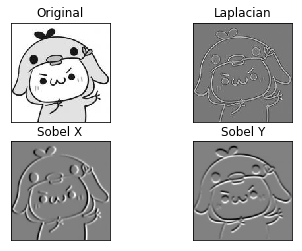

In [6]:
img = cv2.imread('hi.png',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

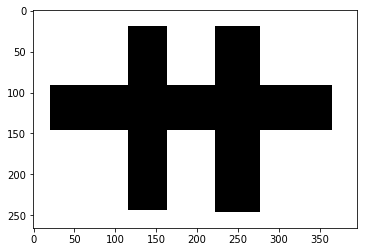

In [16]:
img = cv2.imread('images/edge.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

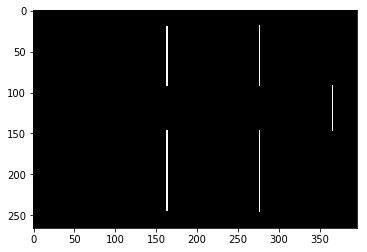

In [33]:

sobelx = cv2.Sobel(img,-1,1,0,5)
sobely = cv2.Sobel(img,-1,0,1,5) # np.uint8 深度丧失了一条边的边界
plt.imshow(sobelx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


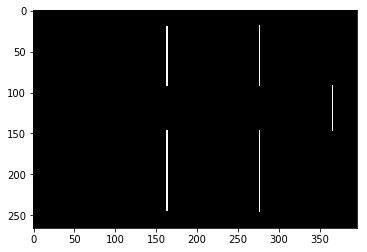

In [34]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,5) #64不会进行截断,存在了负值-255
abs_sobelx = cv2.convertScaleAbs(sobelx) # 故而需要进行绝对值话
abs_sobely = cv2.convertScaleAbs(sobely)
plt.imshow(sobelx) # 警告有负值数据

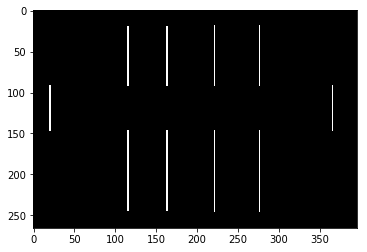

In [35]:
plt.imshow(abs_sobelx) #convertScaleAbs 进行绝对值化

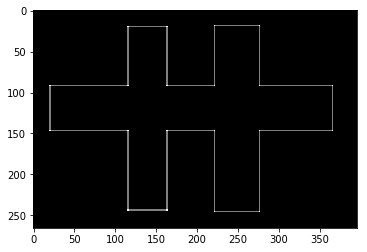

In [36]:
dst = cv2.addWeighted(abs_sobelx,0.5,abs_sobely,0.5,0)
plt.imshow(dst)

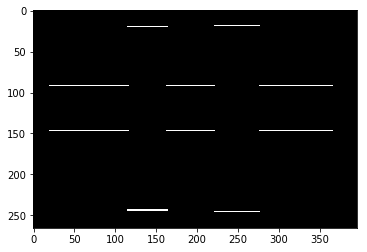

In [24]:
plt.imshow(abs_sobely)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


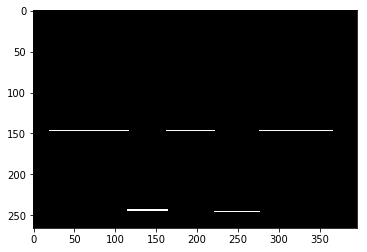

In [25]:
plt.imshow(sobely)

In [30]:
sobely.shape

(266, 396, 3)

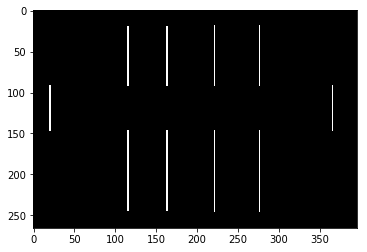

In [39]:
scharr_x = cv2.Scharr(img,cv2.CV_64F,1,0)
abs_scharr_x = cv2.convertScaleAbs(scharr_x)
plt.imshow(abs_scharr_x)